<a href="https://colab.research.google.com/github/ferngndo/estudando/blob/main/ES_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap -q
!pip install earthengine-api -q
!pip install geobr -q
!pip install geopandas -q
!pip install descartes -q
!pip install rasterio -q
!pip install matplotlib-scalebar -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.16.0 requires geopandas>=0.12.2, but you have geopandas 0.7.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 39.2 MB/s eta 0:00:00


In [ ]:
import ee
import geemap
import numpy as np
import geopandas as gpd
import geobr
import json
import rasterio as rio
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
ee.Authenticate()
ee.Initialize(project='ee-fernandogomesgeo')

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/area_de_estudos/municipios_sga_sirgas.shp')
gdf.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3201803,Divino de São Lourenço,ES,174.039,"POLYGON ((-41.77461 -20.50206, -41.77447 -20.5..."
1,3202009,Dores do Rio Preto,ES,159.298,"POLYGON ((-41.80175 -20.47657, -41.79944 -20.4..."
2,3202553,Ibitirama,ES,330.874,"POLYGON ((-41.77285 -20.37310, -41.77194 -20.3..."
3,3202652,Irupi,ES,184.807,"POLYGON ((-41.66874 -20.26418, -41.66935 -20.2..."
4,3203007,Iúna,ES,460.586,"POLYGON ((-41.66738 -20.21045, -41.66756 -20.2..."


/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<Axes: >

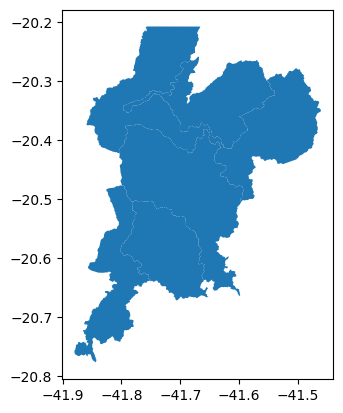

In [ ]:
gdf.plot()

In [ ]:
# ##convertendo de shp para to json
shp_json = gdf.to_json()
##Carregando o arquivo json
region = json.loads(shp_json)
##selecionando as features
region = region['features']
##Verificando o processo
region

[{'id': '0',
  'type': 'Feature',
  'properties': {'AREA_KM2': 174.039,
   'CD_MUN': '3201803',
   'NM_MUN': 'Divino de São Lourenço',
   'SIGLA': 'ES'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-41.774605522999956, -20.502062395999904],
     [-41.77447312699993, -20.502308015999976],
     [-41.77407129199999, -20.502787122999916],
     [-41.77364935499998, -20.502994400000016],
     [-41.77318388599993, -20.503316961999882],
     [-41.77271325899998, -20.503353131999944],
     [-41.77213830700001, -20.503505557999947],
     [-41.77192759399998, -20.503623513999937],
     [-41.77142708399996, -20.50368880599992],
     [-41.77123002199991, -20.50372060199988],
     [-41.770861915999916, -20.503540272999977],
     [-41.770510553999976, -20.503445618999958],
     [-41.76998093499994, -20.503582989999956],
     [-41.76959969099993, -20.50351745799996],
     [-41.769094544999966, -20.503324990999925],
     [-41.768695787999924, -20.50313082299993],
     [-41.768161534999955, -

In [ ]:
centroid = gdf.centroid
x =str(centroid.x)[4:-15]
y =str(centroid.y)[4:-15]

In [ ]:
print(x)

-41.724462
1   -41.812111
2   -41.692623
3   -41.636806
4   -41.656500


In [ ]:
print(y)

-20.586796
1   -20.635008
2   -20.485956
3   -20.331152
4   -20.348481


In [ ]:
roi = ee.FeatureCollection(region)

In [ ]:
srtm = ee.Image("NASA/NASADEM_HGT/001").select('elevation').clip(roi)
# Map = geemap.Map(location =[y,x], zoom=10 )
Map.centerObject(roi,10)
Map.addLayer(srtm, {'palette':['grey','green','darkgreen','orange','red','darkred'],'min':0, 'max':3000}, 'SRTM');
Map

Map(bottom=146548.0, center=[-20.447292188915654, -41.69078742468679], controls=(WidgetControl(options=['posit…

In [ ]:
task = ee.batch.Export.image.toDrive(image=srtm.toFloat(),  # um objeto ee.Image.
                                     region=roi.geometry(),  # um objeto ee.Geometry.
                                     description='srtm',
                                     folder='Resultados_ES',
                                     fileNamePrefix='srtm',
                                     scale=30,
                                     maxPixels=1e13,
                                     crs='EPSG:4674')

##Inicie o Download
task.start()

In [ ]:
task.status()

{'state': 'RUNNING',
 'description': 'srtm',
 'creation_timestamp_ms': 1702748405049,
 'update_timestamp_ms': 1702748410409,
 'start_timestamp_ms': 1702748410375,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'id': 'FZATDJMSE3LHXDR7FMFHVXHE',
 'name': 'projects/ee-fernandogomesgeo/operations/FZATDJMSE3LHXDR7FMFHVXHE'}

In [ ]:
collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
                                  .filterDate('2021-01-01','2022-01-01')\
                                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1))\
                                  .filterBounds(ee.Geometry.Polygon([[-41.812111, -20.635008],
                                                                     [-41.692623, -20.485956],
                                                                     [-41.636806, -20.331152],
                                                                     [-41.656500, -20.348481]]))\
                                  .sort('CLOUDY_PIXEL_PERCENTAGE')\
                                  .median()\
                                  .multiply(0.0001).clip(roi)
##Calculo do NDVI
ndvi = collection.normalizedDifference(['B8','B4']).rename('ndvi')

In [ ]:
Map.centerObject(roi,10)
Map_.addLayer(ndvi, {'palette':['red','yellow','green'],'min':-1, 'max':1}, 'NDVI');
Map_

Map(bottom=293172.0, center=[-20.63792498541309, -41.77409926871492], controls=(WidgetControl(options=['positi…

In [ ]:
task = ee.batch.Export.image.toDrive(image=ndvi.clip(roi),  # um objeto ee.Image.
                                     region=roi.geometry(),  # um objeto ee.Geometry.
                                     description='ndvi',
                                     folder='Resultados_ES',
                                     fileNamePrefix='ndvi',
                                     scale=30,
                                     maxPixels=1e13,
                                     crs='EPSG:4674')
##Inicie o Download
task.start()

In [ ]:
task.status()

{'state': 'RUNNING',
 'description': 'ndvi',
 'creation_timestamp_ms': 1702749384865,
 'update_timestamp_ms': 1702749391480,
 'start_timestamp_ms': 1702749391445,
 'task_type': 'EXPORT_IMAGE',
 'attempt': 1,
 'id': 'ROQP2B4OMWHGYAPRIM7YHXYN',
 'name': 'projects/ee-fernandogomesgeo/operations/ROQP2B4OMWHGYAPRIM7YHXYN'}

In [ ]:
##Instalar a biblioteca
!pip install earthpy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.6 MB/s eta 0:00:00


In [ ]:
##Importar
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

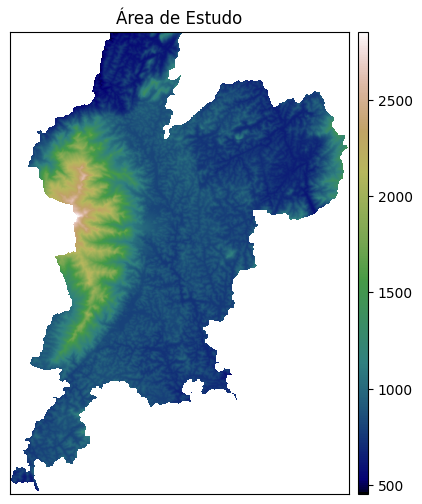

In [ ]:
# Caminho dos dados SRTM
dtm = "/content/drive/MyDrive/Resultados_ES/srtm.tif"

# Abra o DEM com Rasterio
with rio.open(dtm) as src:
    elevation = src.read(1)  # Converta para float
    # Defina os valores mascarados como np.nan
    elevation[elevation < 0] = np.nan


# Plote os dados
ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="Área de Estudo",
    figsize=(10, 6),
)
plt.show()

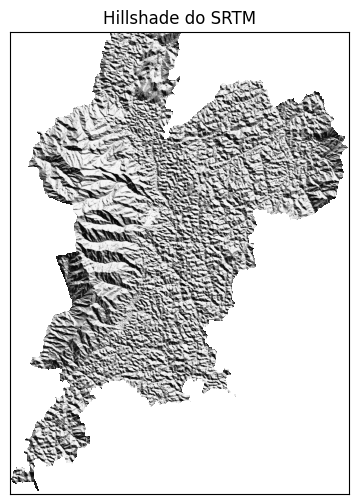

In [ ]:
# Crie e plote a sombra da colina com earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade do SRTM",
    figsize=(10, 6),
)
plt.show()

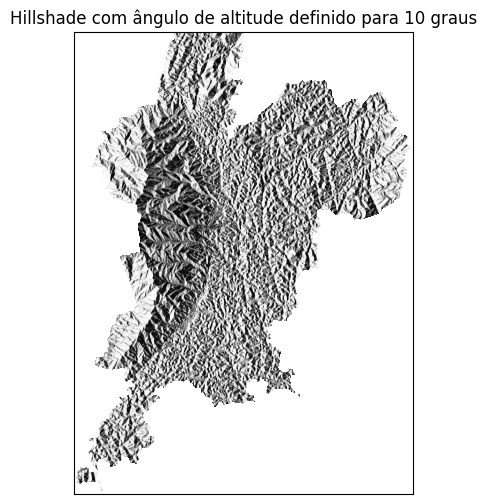

In [ ]:
# Ajuste o valor do azimute
hillshade_angle_10_az_210 = es.hillshade(elevation,azimuth=270, altitude=10)

# Plote a camada de sombreamento com a altitude do ângulo modificado
ep.plot_bands(
    hillshade_angle_10_az_210,
    cbar=False,
    title="Hillshade com ângulo de altitude definido para 10 graus",
    figsize=(10, 6),
)
plt.show()

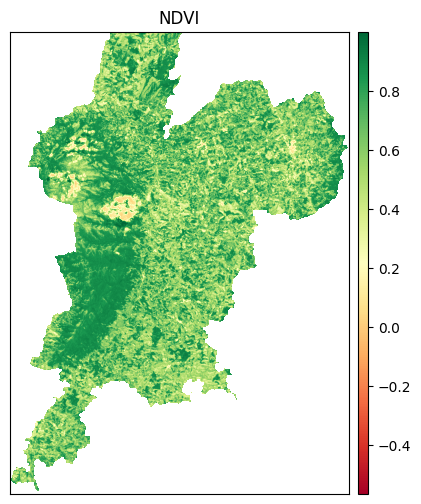

In [ ]:
##Abrir dados NDVI
path_ndvi = '/content/drive/MyDrive/Resultados_ES/ndvi.tif'

# Open the DEM with Rasterio
with rio.open(path_ndvi) as src:
    ndvi = src.read(1)

# Plot the data
ep.plot_bands(
    ndvi,
    cmap="RdYlGn",
    title="NDVI",
    figsize=(10, 6),
)
plt.show()

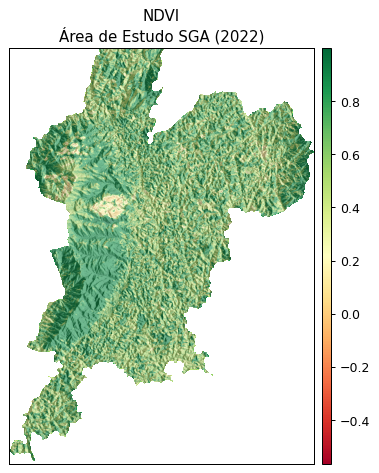

In [ ]:
##Mapa com hillshade
fig, ax = plt.subplots(figsize=(10, 6),dpi=90)
ep.plot_bands(
    ndvi,
    ax=ax,
    cmap="RdYlGn",
    title="NDVI\nÁrea de Estudo SGA (2022)",
)
ax.imshow(hillshade_angle_10_az_210, cmap="Greys", alpha=0.4)
plt.show()

In [ ]:
srtm = rio.open('/content/drive/MyDrive/Resultados_ES/srtm.tif')
srtm.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1554,
 'height': 2118,
 'count': 1,
 'crs': CRS.from_epsg(4674),
 'transform': Affine(0.00026949458523585647, 0.0, -41.879997534822564,
        0.0, -0.00026949458523585647, -20.20670400098452)}

In [ ]:
##Definindo os parâmentros
out_meta = srtm.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':srtm.shape[1],
                 'height':srtm.shape[0],
                 'count':1,
                 'dtype':'float32',
                 'crs':srtm.crs,
                 'transform':srtm.transform,
                 'nodata':-9999.99})

##local  para salvar
outpath = r'/content/drive/MyDrive/Resultados_ES/'

In [ ]:
# Lendo o arquio na pasta
with rio.open(os.path.join(outpath, 'hillshade_earthpy.tif'), #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(hillshade_angle_10_az_210, 1) # numero de bandas

In [ ]:
##Forma 2
kwargs = srtm.meta
kwargs.update(
    dtype=rio.float32,
    count=1,
    compress='lzw')

with rio.open(os.path.join(outpath, 'hillshade_earthpy.tif'), 'w', **kwargs) as dst:
    dst.write_band(1, hillshade_angle_10_az_210.astype(rio.float32))

In [ ]:
path = '/content/drive/MyDrive/Resultados_ES/hillshade_earthpy.tif'

##Abrindo imagem
src = rio.open(path)

In [ ]:
##Acessanto os metadados
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1554,
 'height': 2118,
 'count': 1,
 'crs': CRS.from_epsg(4674),
 'transform': Affine(0.00026949458523585647, 0.0, -41.879997534822564,
        0.0, -0.00026949458523585647, -20.20670400098452)}

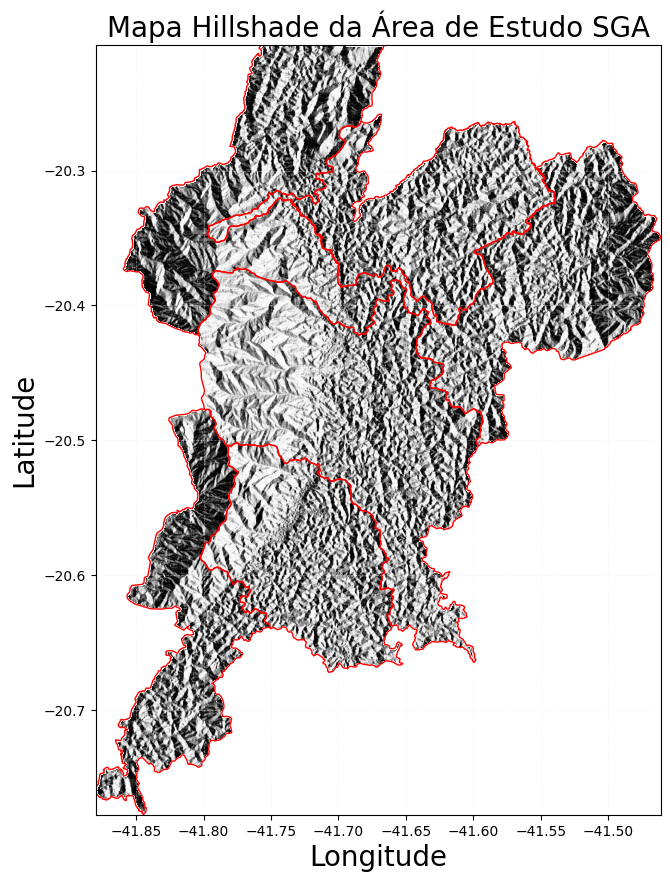

In [ ]:
##Plotando nosso mapa
fig, ax = plt.subplots(figsize=(18, 10), dpi=100)


# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rio.plot.show(src, extent=extent, ax=ax, cmap="Greys" ,transform=src.transform, vmin=0)
gdf.boundary.plot(ax=ax, linewidth=1, color='red')

##Titulo
plt.title('Mapa Hillshade da Área de Estudo SGA', fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)
ax.set_xlabel('Longitude',fontsize=20)
# Definir cor de fundo como branco
ax.set_facecolor('white')

##Definir Grid
plt.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5  )
plt.show()

In [ ]:
##Adcionar o NDVI
path_ndvi = '/content/drive/MyDrive/Resultados_ES/ndvi.tif'

NDVI = rio.open(path_ndvi)

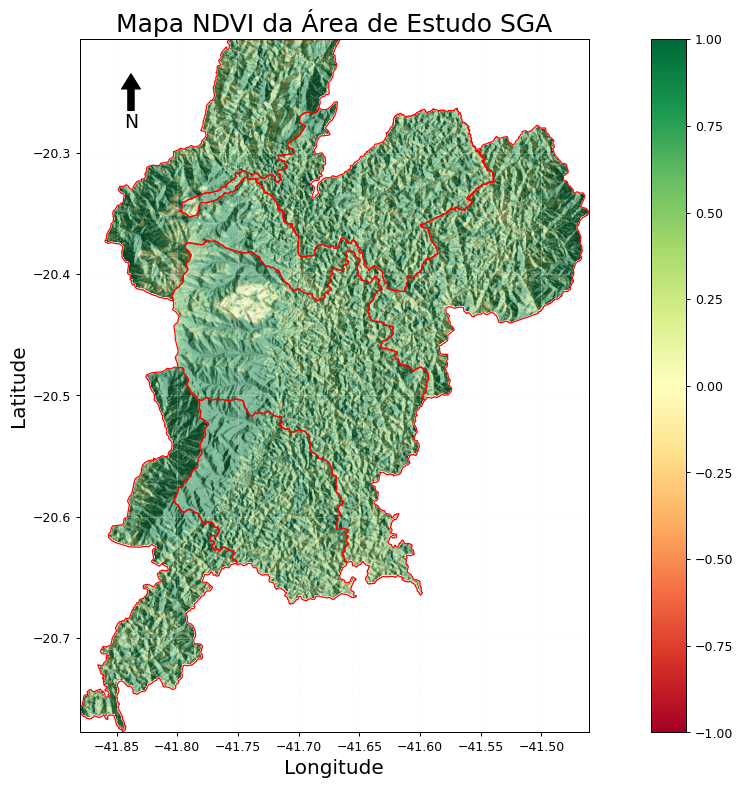

In [ ]:
##Plotando nosso mapa
fig, ax = plt.subplots(figsize=(18, 10), dpi=90)

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rio.plot.show(src, extent=extent, ax=ax, cmap="Greys" ,transform=src.transform, vmin=0)
gdf.boundary.plot(ax=ax, linewidth=1, color='red')

##Titulo
plt.title('Mapa NDVI da Área de Estudo SGA', fontsize=20)
ax.set_ylabel('Latitude',fontsize=16)
ax.set_xlabel('Longitude',fontsize=16)

##NDVI
image_hidden = ax.imshow(ndvi,
                         cmap='RdYlGn', vmin=-1, vmax=1)

# traça no mesmo eixo com rio.plot.show
image = rio.plot.show(ndvi,
                      transform=src.transform,
                      ax=ax,
                      cmap='RdYlGn',
                      alpha=0.5, vmin=-1, vmax=1)

# adicione a barra de cores usando a imagem agora oculta
fig.colorbar(image_hidden, ax=ax)

##Definir Grid
plt.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

##Adicionar informações ao texto
x, y, arrow_length = 0.1, 0.95, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)

plt.show()

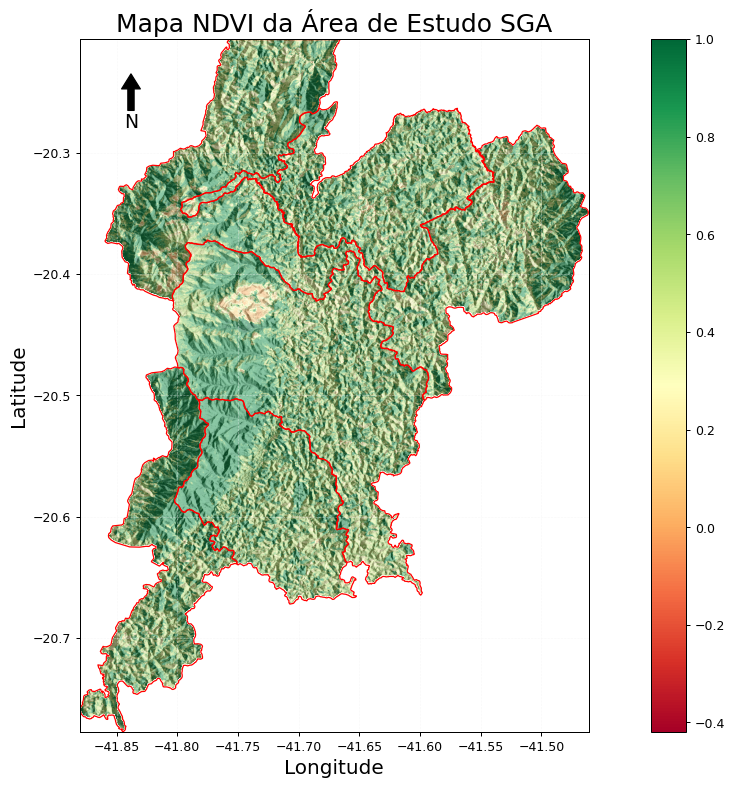

In [ ]:
##Plotando nosso mapa
fig, ax = plt.subplots(figsize=(18, 10), dpi=90)

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rio.plot.show(src, extent=extent, ax=ax, cmap="Greys" ,transform=src.transform, vmin=0)
gdf.boundary.plot(ax=ax, linewidth=1, color='red')

##Titulo
plt.title('Mapa NDVI da Área de Estudo SGA', fontsize=20)
ax.set_ylabel('Latitude',fontsize=16)
ax.set_xlabel('Longitude',fontsize=16)

##NDVI
image_hidden = ax.imshow(ndvi,
                         cmap='RdYlGn', vmin=-0.42, vmax=1)

# traça no mesmo eixo com rio.plot.show
image = rio.plot.show(ndvi,
                      transform=src.transform,
                      ax=ax,
                      cmap='RdYlGn',
                      alpha=0.5, vmin=-0.42, vmax=1)

# adicione a barra de cores usando a imagem agora oculta
fig.colorbar(image_hidden, ax=ax)

##Definir Grid
plt.grid(color='0.95', linestyle='dashed', linewidth=0.5, alpha=0.5)

##Adicionar informações ao texto
x, y, arrow_length = 0.1, 0.95, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)

plt.show()